# 전체 과정 요약  
LLM 기반 AI 에이전트를 개발할 때 핵심 요소는 LLM 자체입니다. 대부분의 경우, 기초부터 새로운 LLM을 구축하기보다는 공개된 모델을 가져와 특정 용도에 맞게 조정하여 사용하는 방식이 일반적입니다. 하지만 최근에는 LLM을 처음부터 개발하는 기술적 장벽이 점차 낮아지고 있어, 각 기업이 자체적으로 최적화된 LLM을 구축하는 사례가 증가할 가능성이 높습니다.  

## LLM 개발의 기본 과정  
LLM을 구축하는 과정은 크게 다음과 같은 단계를 거칩니다.  

1. **사전훈련(Pretraining)**: 일반적인 언어 이해 및 생성 능력을 학습  
2. **미세조정(Fine-tuning)**: 특정 업무나 도메인에 맞게 추가 학습  

이 과정에 더해, **데이터베이스 및 인터넷 검색 기능**을 통합하면 모델의 정보 범위와 정확도를 더욱 향상시킬 수 있습니다. 또한, 인간이 논리적 사고를 거듭하며 더 깊이 있는 결론을 도출하는 것처럼, LLM도 **내부적으로 질의를 반복하여 최적의 답을 찾는 방식**으로 개선할 수 있습니다.  

이번 과정에서는 LLM의 기본 원리를 이해하기 위해 **사전훈련 과정을 처음부터 직접 수행**해 보겠습니다. 훈련 절차는 일반적인 머신러닝 방법론을 따르며, 다음과 같은 흐름으로 진행됩니다.  

## 훈련 과정 개요  
1. **훈련 데이터 준비**  
   - 사용할 텍스트 데이터를 읽어 정리한 후, `cleaned_` 접두사를 붙여 가공된 파일로 저장합니다.  
   - 예시: `alice.txt` → `cleaned_alice.txt`  

2. **데이터 로더 정의**  
   - 모델이 효율적으로 학습할 수 있도록 데이터를 배치 형태로 로드하는 과정  

3. **모델 정의**  
   - 사전훈련을 위한 LLM 아키텍처 설정  

4. **훈련 실행**  
   - 정의된 모델을 기반으로 데이터 학습 진행  

5. **결과 확인**  
   - 모델의 성능 및 학습 진행 상황을 평가  

예제 데이터셋으로는 **캐글에서 제공하는 해리포터 책(Harry Potter Books)** 또는 **앨리스 책(alice.txt)** 등을 활용할 수 있습니다.  


In [1]:
import re  # 정규 표현식 모듈을 불러옴

def clean_text(filename):
    """
    주어진 텍스트 파일을 불러와 불필요한 줄바꿈과 공백을 제거한 후,
    새로운 파일로 저장하는 함수.
    
    :param filename: 원본 텍스트 파일의 이름 (문자열)
    """
    
    # 파일을 읽기 모드('r')로 열고 UTF-8 인코딩을 사용하여 내용을 가져옴
    with open(filename, 'r', encoding='utf-8') as file:
        book_text = file.read()

    # 여러 개의 연속된 줄바꿈(\n)을 공백(' ')으로 변경
    cleaned_text = re.sub(r'\n+', ' ', book_text)

    # 여러 개의 연속된 공백(\s)을 하나의 공백(' ')으로 변경
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # 정리된 텍스트의 총 문자 수 출력
    print("cleaned_" + filename, len(cleaned_text), "characters")

    # 정리된 텍스트를 새로운 파일("cleaned_" + 원본파일명)로 저장
    with open("cleaned_" + filename, 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

# 정리할 파일 목록을 리스트로 정의
filenames_list = ["02 Harry Potter and the Chamber of Secrets.txt"]

# 리스트에 있는 각 파일에 대해 clean_text 함수를 호출하여 처리
for filename in filenames_list:
    clean_text(filename)


cleaned_02 Harry Potter and the Chamber of Secrets.txt 488771 characters


토큰화
UTF-8 BPE(Bype Pair Encoding)

In [2]:
import tiktoken  # tiktoken 라이브러리를 불러옴 (설치 필요: pip install tiktoken)

# GPT-2 모델에서 사용하는 인코딩 방식 가져오기
tokenizer = tiktoken.get_encoding("gpt2")

# 입력할 텍스트 정의
text = "Harry Potter was a wizard."

# 텍스트를 토큰으로 변환 (인코딩)
tokens = tokenizer.encode(text)

# 글자 수와 토큰 수 출력
print("글자수:", len(text), "토큰수:", len(tokens))

# 변환된 토큰 리스트 출력
print(tokens)

# 토큰을 다시 텍스트로 변환 (디코딩)하여 출력
print(tokenizer.decode(tokens))

# 개별 토큰과 해당 토큰이 의미하는 문자열 출력
for t in tokens:
    print(f"{t}\t -> {tokenizer.decode([t])}")


글자수: 26 토큰수: 6
[18308, 14179, 373, 257, 18731, 13]
Harry Potter was a wizard.
18308	 -> Harry
14179	 ->  Potter
373	 ->  was
257	 ->  a
18731	 ->  wizard
13	 -> .


In [3]:
# from transformers import AutoTokenizer # pip install transformers

# tokenizer = AutoTokenizer.from_pretrained("LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct")  # KoGPT2 사용
# # tokenizer = AutoTokenizer.from_pretrained("skt/kogpt2-base-v2")  # KoGPT2 사용

# print("Vocab size :", len(tokenizer))

# text = "한국어 테스트"

# tokens = tokenizer.encode(text)

# print(len(text), len(tokens))
# print(tokens)
# print(tokenizer.decode(tokens))

In [4]:
for char in text:
    token_ids = tokenizer.encode(char)     # 한 글자씩 인코딩(토큰화)
    decoded = tokenizer.decode(token_ids)  # 한 글자씩 디코딩
    print(f"{char} -> {token_ids} -> {decoded}")

H -> [39] -> H
a -> [64] -> a
r -> [81] -> r
r -> [81] -> r
y -> [88] -> y
  -> [220] ->  
P -> [47] -> P
o -> [78] -> o
t -> [83] -> t
t -> [83] -> t
e -> [68] -> e
r -> [81] -> r
  -> [220] ->  
w -> [86] -> w
a -> [64] -> a
s -> [82] -> s
  -> [220] ->  
a -> [64] -> a
  -> [220] ->  
w -> [86] -> w
i -> [72] -> i
z -> [89] -> z
a -> [64] -> a
r -> [81] -> r
d -> [67] -> d
. -> [13] -> .


데이터로더(DataLoader)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    """
    주어진 텍스트를 토큰화한 후, 일정한 길이(max_length)로 분할하여 학습용 데이터셋을 생성하는 클래스.
    
    - 입력 시퀀스(input_ids)와 정답 시퀀스(target_ids)를 생성.
    - stride 간격으로 데이터 슬라이딩 윈도우 방식으로 분할.
    """

    def __init__(self, txt, max_length, stride):
        self.input_ids = []  # 입력 데이터 리스트
        self.target_ids = []  # 정답 데이터 리스트

        # 텍스트를 토큰화하여 토큰 ID 리스트 생성
        # "<|endoftext|>" 토큰을 포함하려면 주석 해제
        # token_ids = tokenizer.encode("<|endoftext|>" + txt, allowed_special={"<|endoftext|>"})
        token_ids = tokenizer.encode(txt)

        print("# of tokens in txt:", len(token_ids))  # 전체 토큰 개수 출력

        # 슬라이딩 윈도우 방식으로 데이터 분할
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]  # 입력 데이터 (max_length 크기)
            target_chunk = token_ids[i + 1: i + max_length + 1]  # 정답 데이터 (다음 토큰)

            # 텐서로 변환하여 리스트에 저장
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        """ 데이터셋의 총 샘플 개수 반환 """
        return len(self.input_ids)

    def __getitem__(self, idx):
        """ 특정 인덱스의 데이터 반환 """
        return self.input_ids[idx], self.target_ids[idx]


# 정리된 텍스트 파일을 불러오기
with open("cleaned_02 Harry Potter and the Chamber of Secrets.txt", 'r', encoding='utf-8-sig') as file:
    txt = file.read()

# 데이터셋 생성 (max_length=32, stride=4)
dataset = MyDataset(txt, max_length=32, stride=4)

# DataLoader 생성 (배치 크기 128, 셔플 적용, 마지막 배치 버림)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True, drop_last=True)

# 주의: test 및 valid 데이터셋 분할은 생략됨.


# of tokens in txt: 130520


In [6]:
# DataLoader의 iterator 생성
dataiter = iter(train_loader)

# 첫 번째 배치 데이터 가져오기
x, y = next(dataiter)

# 첫 번째 샘플을 토큰에서 텍스트로 변환하여 출력
print("입력 시퀀스:")
print(tokenizer.decode(x[0].tolist()))  # 첫 번째 입력 데이터 디코딩

print("\n정답 시퀀스 (다음 토큰):")
print(tokenizer.decode(y[0].tolist()))  # 첫 번째 정답 데이터 디코딩


입력 시퀀스:
 inside it. “Remember Millicent Bulstrode wrestling with me at the Dueling Club? She left this on my robes when she was trying to str

정답 시퀀스 (다음 토큰):
 it. “Remember Millicent Bulstrode wrestling with me at the Dueling Club? She left this on my robes when she was trying to strangle


뉴럴네트워크 모델 정의
"Build a Large Language Model (From Scratch)"에서 제공하는 예제 코드를 참조

In [7]:
# 모델을 정의할 때 사용하는 하이퍼파라미터 및 상수

VOCAB_SIZE = tokenizer.n_vocab  # Tiktoken 기반의 어휘 크기 (GPT-2: 50257개 토큰)
# VOCAB_SIZE = len(tokenizer)  # AutoTokenizer 사용 시 (주석 처리됨)

CONTEXT_LENGTH = 128  # 컨텍스트 길이 (기본값: 1024에서 줄임, 메모리 절약 목적)
EMB_DIM = 768  # 임베딩 차원 (GPT-2 Small과 동일)
NUM_HEADS = 12  # 어텐션 헤드 개수 (GPT-2 Small 기준)
NUM_LAYERS = 12  # Transformer 레이어 개수
DROP_RATE = 0.1  # 드롭아웃 비율 (과적합 방지용)
QKV_BIAS = False  # Query-Key-Value (QKV) 연산에서 bias 사용 여부 (기본적으로 False)


In [8]:
# 텍스트를 토큰화하여 토큰 ID 리스트 생성
token_ids = tokenizer.encode(txt)

# 토큰 ID의 최댓값과 최솟값 출력
print(f"Max token ID = {max(token_ids)}")  # 사용된 토큰 중 가장 큰 ID
print(f"Min token ID = {min(token_ids)}")  # 사용된 토큰 중 가장 작은 ID

# 설정한 어휘 사전 크기 출력
print(f"VOCAB_SIZE = {VOCAB_SIZE}")  # 토크나이저의 전체 어휘 크기

Max token ID = 50255
Min token ID = 0
VOCAB_SIZE = 50257


In [9]:
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        
        assert d_out % NUM_HEADS == 0, "d_out must be divisible by n_heads"

        self.d_out = d_out
        self.head_dim = d_out // NUM_HEADS  # 각 헤드의 차원 크기

        # Query, Key, Value 프로젝션 레이어 정의 (bias 사용 여부는 QKV_BIAS 값에 따라 결정)
        self.W_query = nn.Linear(d_in, d_out, bias=QKV_BIAS)
        self.W_key = nn.Linear(d_in, d_out, bias=QKV_BIAS)
        self.W_value = nn.Linear(d_in, d_out, bias=QKV_BIAS)

        # 최종 출력 프로젝션 레이어
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(DROP_RATE)  # 드롭아웃 추가

        # Causal Mask (미래 정보를 참조하지 못하도록 상삼각행렬을 만듦)
        self.register_buffer('mask', torch.triu(torch.ones(CONTEXT_LENGTH, CONTEXT_LENGTH), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape  # 배치 크기, 토큰 개수, 입력 차원

        # Query, Key, Value 생성
        keys = self.W_key(x)  
        queries = self.W_query(x)
        values = self.W_value(x)

        # (b, num_tokens, d_out) -> (b, num_tokens, NUM_HEADS, head_dim)
        keys = keys.view(b, num_tokens, NUM_HEADS, self.head_dim)
        values = values.view(b, num_tokens, NUM_HEADS, self.head_dim)
        queries = queries.view(b, num_tokens, NUM_HEADS, self.head_dim)

        # 차원 변환: (b, num_tokens, NUM_HEADS, head_dim) → (b, NUM_HEADS, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # 어텐션 스코어 계산 (쿼리 @ 키의 전치 연산)
        attn_scores = queries @ keys.transpose(2, 3)  # (b, NUM_HEADS, num_tokens, num_tokens)

        # Causal Mask 적용 (미래 정보를 참조하지 않도록 설정)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        # 소프트맥스 및 드롭아웃 적용 후 가중합 수행
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # 값 벡터를 어텐션 가중치로 가중합한 후 차원 변환
        context_vec = (attn_weights @ values).transpose(1, 2)
        context_vec = context_vec.reshape(b, num_tokens, self.d_out)

        # 최종 출력
        context_vec = self.out_proj(context_vec)
        return context_vec


class LayerNorm(nn.Module):
    """ Layer Normalization (PyTorch 기본 LayerNorm 대신 직접 구현) """
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))  # 학습 가능한 스케일
        self.shift = nn.Parameter(torch.zeros(emb_dim))  # 학습 가능한 시프트

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift


class GELU(nn.Module):
    """ 활성화 함수 GELU (PyTorch 기본 제공되지 않는 버전) """
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    """ Position-wise FeedForward Network """
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(EMB_DIM, 4 * EMB_DIM),  # 확장된 차원
            GELU(),  # 활성화 함수
            nn.Linear(4 * EMB_DIM, EMB_DIM),  # 다시 원래 차원으로 축소
        )

    def forward(self, x):
        return self.layers(x)


class TransformerBlock(nn.Module):
    """ Transformer Block (MultiHeadAttention + FeedForward + LayerNorm) """
    def __init__(self):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=EMB_DIM,
            d_out=EMB_DIM)
    
        self.ff = FeedForward()
        self.norm1 = LayerNorm(EMB_DIM)
        self.norm2 = LayerNorm(EMB_DIM)
        self.drop_shortcut = nn.Dropout(DROP_RATE)

    def forward(self, x):
        # 어텐션 블록 + Residual Connection
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        # FeedForward 블록 + Residual Connection
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        return x


class GPTModel(nn.Module):
    """ GPT 모델 정의 (Embedding + Transformer Blocks + Output Projection) """
    def __init__(self):
        super().__init__()
        self.tok_emb = nn.Embedding(VOCAB_SIZE, EMB_DIM)  # 토큰 임베딩
        self.pos_emb = nn.Embedding(CONTEXT_LENGTH, EMB_DIM)  # 위치 임베딩
        self.drop_emb = nn.Dropout(DROP_RATE)  # 드롭아웃

        # 여러 개의 Transformer Block을 쌓은 모델
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock() for _ in range(NUM_LAYERS)]
        )

        self.final_norm = LayerNorm(EMB_DIM)  # 마지막 LayerNorm
        self.out_head = nn.Linear(EMB_DIM, VOCAB_SIZE, bias=False)  # 출력 레이어

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)  # 토큰 임베딩
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))  # 위치 임베딩 추가
        x = tok_embeds + pos_embeds  # [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)  # Transformer 블록 통과
        x = self.final_norm(x)  # 최종 LayerNorm
        logits = self.out_head(x)  # 출력 로짓 계산
        return logits


훈련

In [10]:
import torch

# GPU가 사용 가능한 경우 CUDA, 그렇지 않으면 CPU 선택
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"  # 강제로 CPU에서 실행하려면 이 줄의 주석을 해제

print(f"Using device: {device}")  # 사용 중인 디바이스 출력

# 랜덤 시드 설정 (재현성 보장)
torch.manual_seed(123)

# GPT 모델 인스턴스 생성 및 디바이스에 로드
model = GPTModel().to(device)

# AdamW 옵티마이저 설정
optimizer = torch.optim.AdamW(
    model.parameters(),  # 모델의 학습 가능한 파라미터들
    lr=0.0004,           # 학습률
    weight_decay=0.1     # L2 정규화 계수 (가중치 감쇠)
)

Using device: cuda


In [11]:
tokens_seen, global_step = 0, -1  # 학습 진행 상태 추적 변수

losses = []  # 에포크별 손실 값을 저장할 리스트

for epoch in range(20):  # 최대 20 에포크 동안 학습 진행
    model.train()  # 모델을 학습 모드로 설정
    
    epoch_loss = 0  # 현재 에포크에서의 총 손실 값 초기화
    for input_batch, target_batch in train_loader:
        optimizer.zero_grad()  # 이전 배치에서 계산된 그래디언트 초기화
        input_batch, target_batch = input_batch.to(device), target_batch.to(device)  # 데이터를 GPU 또는 CPU로 이동

        logits = model(input_batch)  # 모델이 예측한 로짓(logits) 출력
        loss = torch.nn.functional.cross_entropy(
            logits.flatten(0, 1),  # 출력을 (batch_size * sequence_length, vocab_size) 형태로 변경
            target_batch.flatten()  # 정답을 (batch_size * sequence_length,) 형태로 변경
        )
        epoch_loss += loss.item()  # 에포크 손실에 현재 배치 손실을 추가

        loss.backward()  # 손실을 기반으로 그래디언트(기울기) 계산
        optimizer.step()  # 옵티마이저를 사용하여 모델의 가중치 업데이트

        tokens_seen += input_batch.numel()  # 현재까지 처리한 총 토큰 개수 업데이트
        global_step += 1  # 전역 스텝 증가

        if global_step % 1000 == 0:  # 매 1000 스텝마다 진행 상황 출력
            print(f"Tokens seen: {tokens_seen}")

    avg_loss = epoch_loss / len(train_loader)  # 에포크의 평균 손실 계산
    losses.append(avg_loss)  # 손실 기록
    print(f"Epoch: {epoch + 1}, Loss: {avg_loss}")

    # 현재 에포크의 모델 가중치를 저장 (파일명: model_001.pth, model_002.pth, ...)
    torch.save(model.state_dict(), "model_" + str(epoch + 1).zfill(3) + ".pth")


Tokens seen: 4096
Epoch: 1, Loss: 4.398635850177975
Epoch: 2, Loss: 2.2249906860937285
Epoch: 3, Loss: 0.7975240455368372
Tokens seen: 4100096
Epoch: 4, Loss: 0.3918201016394172
Epoch: 5, Loss: 0.3031856160698913
Epoch: 6, Loss: 0.27067329212436525
Epoch: 7, Loss: 0.2539949018185533
Tokens seen: 8196096
Epoch: 8, Loss: 0.24399263581891698
Epoch: 9, Loss: 0.23760943930214784
Epoch: 10, Loss: 0.23132647808611861
Epoch: 11, Loss: 0.22604782591889225
Tokens seen: 12292096
Epoch: 12, Loss: 0.22180081563671744
Epoch: 13, Loss: 0.21754667209827994
Epoch: 14, Loss: 0.21513622793860324
Epoch: 15, Loss: 0.21269897617927686
Tokens seen: 16388096
Epoch: 16, Loss: 0.21014627949224682
Epoch: 17, Loss: 0.20854536842877472
Epoch: 18, Loss: 0.20549855375383783
Epoch: 19, Loss: 0.20375896468171922
Tokens seen: 20484096
Epoch: 20, Loss: 0.20105006809779039


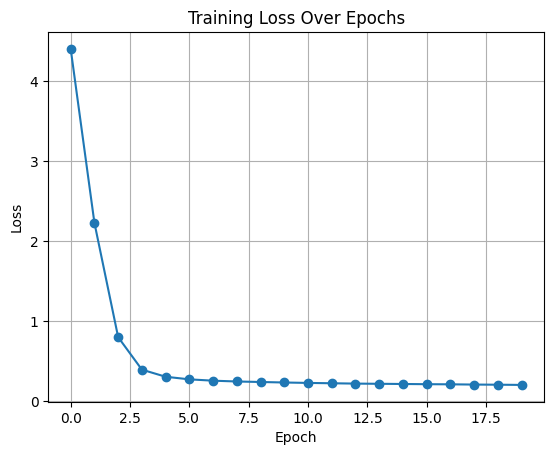

In [12]:
import matplotlib.pyplot as plt

# 학습 손실 그래프 그리기
plt.plot(losses, marker='o', linestyle='-')  # 손실 값 플로팅 (마커 추가)
plt.xlabel('Epoch')  # X축 라벨 (에포크)
plt.ylabel('Loss')  # Y축 라벨 (손실 값)
plt.title('Training Loss Over Epochs')  # 그래프 제목
plt.grid(True)  # 격자 추가 (가독성 향상)
plt.show()  # 그래프 출력

결과 확인

In [14]:
# 파일로 저장했던 네트워크의 가중치들 읽어들이기
model.load_state_dict(torch.load("model_020.pth", map_location=device))  # 저장된 모델 가중치 로드

# 모델을 평가 모드로 설정 (dropout 등 비활성화)
model.eval()  

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(128, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [15]:
idx = tokenizer.encode("Dobby is")  # 입력 문자열을 토큰 ID 리스트로 변환
idx = torch.tensor(idx).unsqueeze(0).to(device)  # 배치 차원 추가 후 GPU/CPU로 이동

with torch.no_grad():  # 그라디언트 계산 비활성화 (추론 모드)
    logits = model(idx)

logits = logits[:, -1, :]  # 마지막 토큰에 대한 예측 로짓(logits) 가져오기

# 가장 확률이 높은 단어 10개 출력
top_logits, top_indices = torch.topk(logits, 10)  
for p, i in zip(top_logits.squeeze(0).tolist(), top_indices.squeeze(0).tolist()):
    print(f"{p:.2f}\t {i}\t {tokenizer.decode([i])}")  # 확률과 함께 디코딩된 단어 출력

# 가장 확률이 높은 단어 출력 (탑-1 예측)
idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # 확률이 가장 높은 인덱스 선택
flat = idx_next.squeeze(0)  # 배치 차원 제거 (torch.Size([1]) → torch.Size([]))
out = tokenizer.decode(flat.tolist())  # 토큰 ID를 텍스트로 변환
print(out)  # 예측된 다음 단어 출력

13.75	 973	  used
11.14	 257	  a
10.98	 1464	  always
10.45	 284	  to
9.99	 1908	  sent
9.97	 635	  also
9.67	 991	  still
9.13	 4978	  caught
9.01	 2982	  heard
8.82	 373	  was
 used


In [16]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]  # 컨텍스트 크기만큼의 최근 토큰을 가져옴
        with torch.no_grad():
            logits = model(idx_cond)  # 모델을 사용하여 다음 토큰의 확률 분포 예측
        logits = logits[:, -1, :]  # 마지막 토큰의 예측 로짓 가져오기

        # Top-k 샘플링 적용
        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)  # 상위 k개의 토큰 선택
            min_val = top_logits[:, -1]  # k번째로 확률이 높은 값
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # 온도 기반 확률 샘플링 적용
        if temperature > 0.0:
            logits = logits / temperature  # 온도를 적용하여 확률 분포 조정
            probs = torch.softmax(logits, dim=-1)  # 확률 분포 계산
            idx_next = torch.multinomial(probs, num_samples=1)  # 확률에 따라 다음 토큰 샘플링
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # 가장 확률이 높은 토큰 선택

        # 종료 토큰이 나오면 중단
        if eos_id is not None and idx_next.item() == eos_id:
            break

        # 새로운 토큰을 기존 시퀀스에 추가
        idx = torch.cat((idx, idx_next), dim=1)

    return idx

In [17]:
start_context = input("Start context: ")  # 사용자 입력 받기

# 입력 텍스트를 토큰화
# idx = tokenizer.encode(start_context, allowed_special={'<|endoftext|>'})  # 필요 시 special token 허용
idx = tokenizer.encode(start_context)
idx = torch.tensor(idx).unsqueeze(0)  # 배치 차원 추가 (shape: [1, sequence_length])

# 모델의 최대 컨텍스트 크기 설정
context_size = model.pos_emb.weight.shape[0] 

for i in range(10):  # 10개의 시퀀스를 생성
    token_ids = generate(
        model=model,
        idx=idx.to(device),  # 입력 토큰을 GPU/CPU로 이동
        max_new_tokens=50,  # 최대 50개 토큰 생성
        context_size=context_size,  # 컨텍스트 크기 설정
        top_k=50,  # 확률이 높은 50개 단어 중 샘플링
        temperature=0.5  # 확률 분포 조정 (낮을수록 보수적인 선택)
    )

    flat = token_ids.squeeze(0)  # 배치 차원 제거
    out = tokenizer.decode(flat.tolist()).replace("\n", " ")  # 텍스트 변환 후 줄바꿈 제거

    print(i, ":", out)  # 생성된 텍스트 출력

0 : dobby’s lip trembled and Harry was seized by a sudden suspicion. “It was you!” he said slowly. “You stopped quickly gone his friends’s ugly baby popped’s the real you, dear!
1 : dobby, but he was supposed to be in the greenhouse, he opened the door and slid inside. Professor Sprout was standing behind a trestle bench in the center of the center of the center of the center to the center of the center to the
2 : dobby’s lip trembled and Harry was seized by a sudden suspicion. “It was you!” he said slowly. “You stopped quickly, Myrtle shouted, what did you, but it’s the way — �
3 : dobby. “I know!” said Lockhart. “Six solid months at the top of the best-seller list! Broke all records,’s Who wanted!’ll be a lovely kind of all records!�
4 : dobby, but it was only Fang’s nose. “What d’you reckon?” Harry said to Ron, whose eyes he could just because he could see him tightly around to make sure they were looking at once again. �
5 : dobby’s lip trembled and Harry was seized by a sudden sus